In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project_root = Path("..").resolve()
df = pd.read_csv(project_root / "data" / "raw" / "vgsales.csv")

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

Matplotlib is building the font cache; this may take a moment.


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

# 16598 Rows and 11 columns

(16598, 11)

In [5]:
# data types for each column
df.dtypes


rank              int64
name                str
platform            str
year            float64
genre               str
publisher           str
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [7]:
# Null per column

df.isna().sum().sort_values(ascending=False)

# Year column has 271 null values here, while publisher has 58 nulls


year            271
publisher        58
rank              0
platform          0
name              0
genre             0
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [26]:
# Drop rows with year and publisher null columns
df = df.dropna(subset=['year'])

df = df.dropna(subset=['publisher'])

df.isna().sum().sort_values(ascending=False)

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [27]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Which columns have missing values?
Two Columns have missing values: year and publisher

Which metrics are skewed?
Global sale is skewed

What surprises you?
Nothing so far


Distribution Analysis (Univariate)

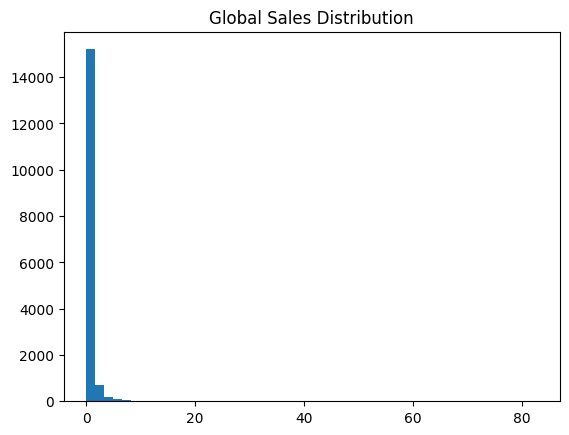

In [28]:
plt.hist(df["global_sales"], bins=50)
plt.title("Global Sales Distribution")
plt.show()

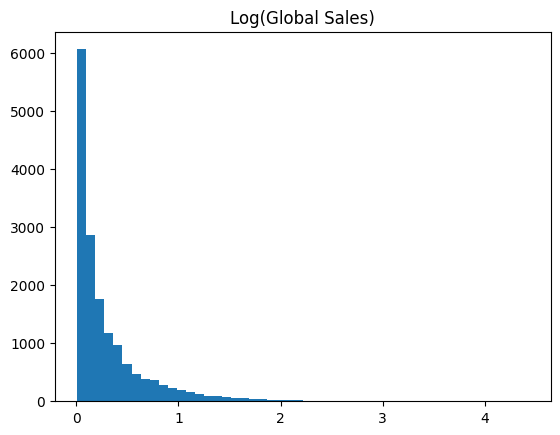

In [29]:
plt.hist(np.log1p(df["global_sales"]), bins=50)
plt.title("Log(Global Sales)")
plt.show()

###Reflection:

Is the distribution normal?
Distribution is not normal, left skewed.

Is it heavy-tailed?
No heavy tailed

Why might log scale be useful?
logs help us reduce the noise and smooth out the volatality.

In [30]:
# Outlier Detection

threshold = df["global_sales"].quantile(0.99)
df[df["global_sales"] > threshold].sort_values("global_sales", ascending=False).head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Questions:

Are these real blockbusters?
Nope.

Do they distort averages?
Not really, since the outlier is in range

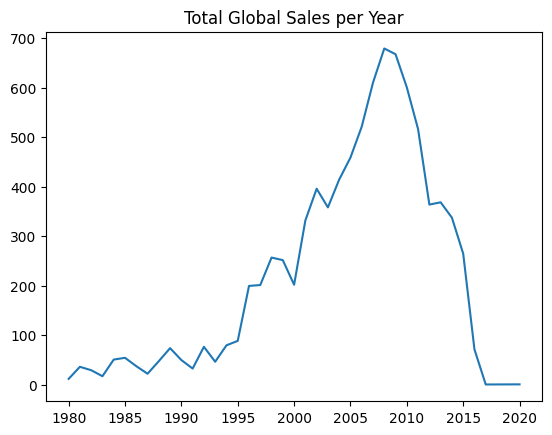

In [31]:
# Time trend

df_year = df.groupby("year")["global_sales"].sum().sort_index()

plt.plot(df_year.index, df_year.values)
plt.title("Total Global Sales per Year")
plt.show()

Questions:

When was peak?
Between 2005 to 2010 was the peak

Is there decline after 2010?
Yes

Could this reflect industry changes?
Possibly

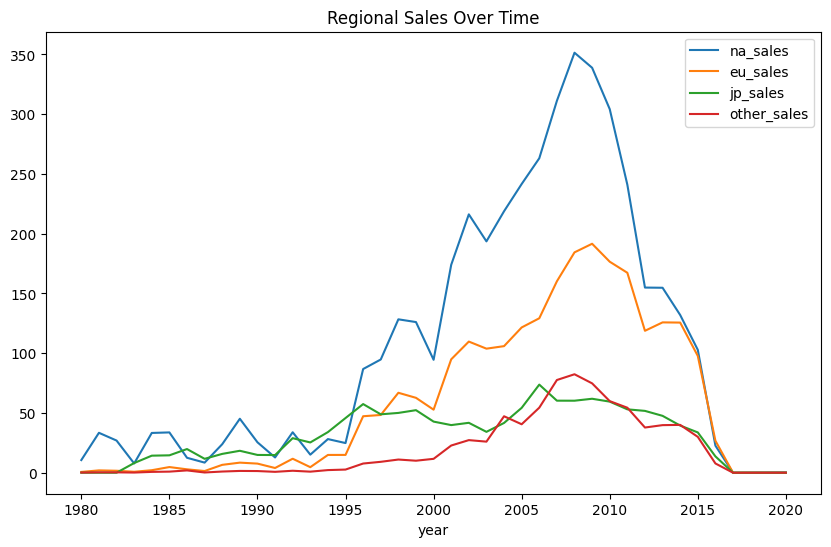

In [32]:
# Regional Market Dynamics

regional_year = df.groupby("year")[["na_sales","eu_sales","jp_sales","other_sales"]].sum()

regional_year.plot(figsize=(10,6))
plt.title("Regional Sales Over Time")
plt.show()

Questions:

Is NA dominant early?
Yes

Does JP peak earlier?
No

Does EU grow steadily?
Yes

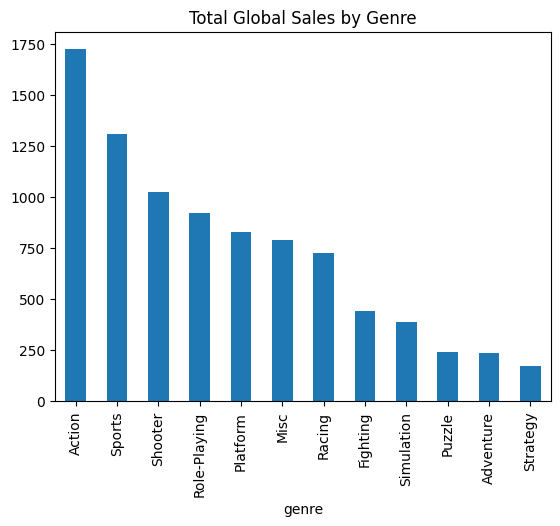

In [33]:
# Genre Market Share

genre_sales = df.groupby("genre")["global_sales"].sum().sort_values(ascending=False)
genre_sales.plot(kind="bar")
plt.title("Total Global Sales by Genre")
plt.show()

In [34]:
platform_year = df.groupby(["platform","year"])["global_sales"].sum().reset_index()


In [35]:
# Correlation Analysis

df[["na_sales","eu_sales","jp_sales","other_sales","global_sales"]].corr()


,na_sales,eu_sales,jp_sales,other_sales,global_sales
na_sales,1.000000,0.768923,0.451283,0.634518,0.941269
eu_sales,0.768923,1.000000,0.436379,0.726256,0.903264
jp_sales,0.451283,0.436379,1.000000,0.290559,0.612774
other_sales,0.634518,0.726256,0.290559,1.000000,0.747964
global_sales,0.941269,0.903264,0.612774,0.747964,1.000000
